# Name:Sundar Gelal
PREDICTION OF PERCENTAGE ODF STUDENT IN THE BASIS OF STUDY HOURS  USING SUPERVISED MACHINE LEARNING APPROACH.

In [1]:
#At first I have to import the library that I am  going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
#Data acquisition phase(1)Importing data from given url
Data_url = "http://bit.ly/w-data"
Data = pd.read_csv(Data_url)
print("Data imported successfully ")
Data.head(9)


Data imported successfully 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81


We have imported our data already .Although Our dataset is so simple but I have included some of the steps to get the insights from our data .This steps are essential for the large data set.

In [3]:
#provides the insights about data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Describes how our data is distributed
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Checks if there is any null values or not
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#Checks if there is any duplicated value or not
Data.duplicated().sum()

0

Now ,Let's visualize our data using matplotlib to gain the insights of our data visually .It will clearly show how our data is distributed.

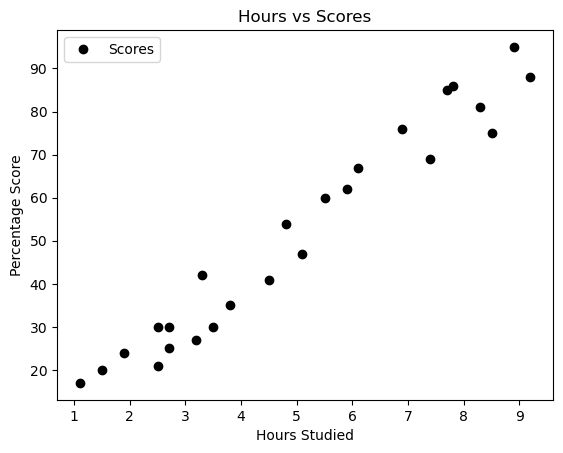

In [7]:
#Plotting the given data points
Data.plot(x='Hours',y='Scores', style='o', color='black')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

Now ,Preparing the data to train the model.As we know our model is supervised machine learning ,So we are dividing the data into attributes and labels.


In [8]:
X= Data.iloc[:, :1].values
y = Data.iloc[:, 1].values

Now splitting our data into training and test sets by using train_test_split() method of Scikit-Learn's .

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

TRAINING OF MODEL

Our data is ready to put into the model.We have splitted it into training and testing sets.Now its time to train our linear regression model.

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Sucessfully trained")


Sucessfully trained


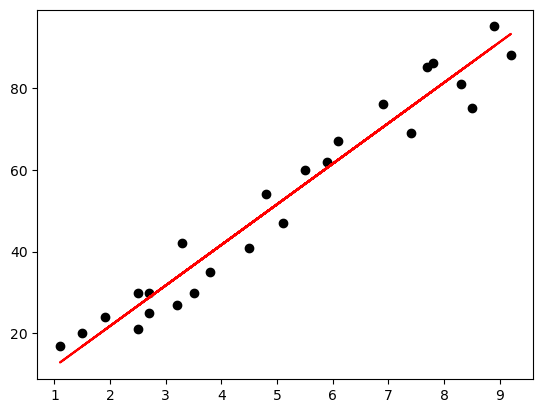

In [11]:
#plotting the regression line
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,y,color='black')
plt.plot(X,line,color='red');
plt.show()

TESTING OUR MODEL We have trained our model now we will test our model by making some prediction

In [12]:
#Lets see our testing data
print(X_test)
#for prediction
y_predic = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
#Lets see how our model has predicted the value and compare it to actual values
Df = pd.DataFrame({'Actual Value':y_test,'Predicted Value by our model':y_predic})
Df

,Actual Value,Predicted Value by our model
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
#lets give our own value to our model and predict it
hours = [[9.25]]
my_predic =  regressor.predict(hours)
print("No of hours = {}".format(hours))
print("Your predicted socre is = {}".format(my_predic[0]))

No of hours = [[9.25]]
Your predicted socre is = 93.69173248737538


EVALUATION OF OUR MODEL To check how efficiently our model is performing in various kinds of data set,We should evaluate our model.For this task ,We have various metrices .In this project ,we are going to use mean square error.

In [15]:
from sklearn import metrics
print('MEAN ABSOLUTE ERROR:',metrics.mean_absolute_error(y_test,y_predic))

MEAN ABSOLUTE ERROR: 4.183859899002975
